In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('./data/consumption_tznaive.csv')
weather = pd.read_csv('./data/frost_weather.csv', delimiter=';')

In [139]:
df.head(5)

,timestamp,mba,metered,profiled,total
0,2023-01-01T00:00:00,NO5,-2019.485724,-4.153720,-2023.639444
1,2023-01-01T01:00:00,NO5,-2023.917013,-4.168644,-2028.085657
2,2023-01-01T02:00:00,NO5,-2015.874382,-4.130058,-2020.004440
3,2023-01-01T03:00:00,NO5,-2012.376016,-4.049524,-2016.425540
4,2023-01-01T04:00:00,NO5,-2008.338157,-4.016533,-2012.354690


In [140]:
weather.head(5)

,sourceId,referenceTime,elementId,value,unit,timeOffset,timeResolution,qualityCode
0,SN18700:0,2017-05-01T00:00:00.000Z,air_temperature,3.0,degC,PT0H,PT1H,2
1,SN18700:0,2017-05-01T00:00:00.000Z,air_temperature,2.2,degC,PT0H,PT1H,0
2,SN18700:0,2017-05-01T01:00:00.000Z,air_temperature,3.8,degC,PT0H,PT1H,2
3,SN18700:0,2017-05-01T01:00:00.000Z,air_temperature,3.2,degC,PT0H,PT1H,0
4,SN18700:0,2017-05-01T02:00:00.000Z,air_temperature,4.0,degC,PT0H,PT1H,2


In [141]:
# turn timestamp into datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['timestamp'] = df['timestamp'].dt.tz_localize('Europe/Oslo', ambiguous='infer').dt.tz_convert('UTC')
df['date'] = df['timestamp'].dt.date
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

df.total = df.total * -1
df.metered = df.metered * -1
df.profiled = df.profiled * -1

df.head(5)

,timestamp,mba,metered,profiled,total,date,year,month,weekday,day,hour
0,2022-12-31 23:00:00+00:00,NO5,2019.485724,4.153720,2023.639444,2022-12-31,2022,12,5,31,23
1,2023-01-01 00:00:00+00:00,NO5,2023.917013,4.168644,2028.085657,2023-01-01,2023,1,6,1,0
2,2023-01-01 01:00:00+00:00,NO5,2015.874382,4.130058,2020.004440,2023-01-01,2023,1,6,1,1
3,2023-01-01 02:00:00+00:00,NO5,2012.376016,4.049524,2016.425540,2023-01-01,2023,1,6,1,2
4,2023-01-01 03:00:00+00:00,NO5,2008.338157,4.016533,2012.354690,2023-01-01,2023,1,6,1,3


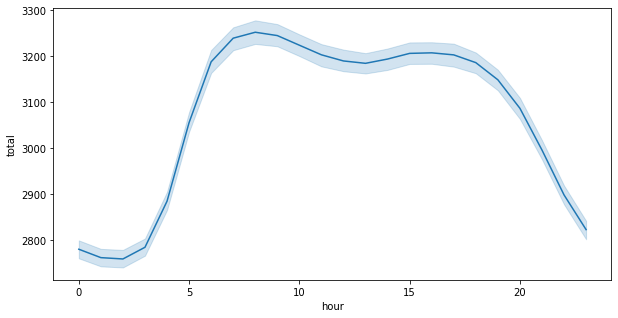

In [142]:
# plot the consumption over hours
plt.figure(figsize=(10,5))
sns.lineplot(x='hour', y='total', data=df)
plt.show()

In [143]:
mba_station_map = {
"SN18700" : "NO1" ,
"SN44560" : "NO2" ,
"SN69100" : "NO3" ,
"SN90490" : "NO4" ,
"SN50540" : "NO5" ,
}

frost_source_names = {
"SN18700" : "Oslo",
"SN44560" : "Sola",
"SN50540" : "Bergen" ,
"SN69100" : "Vaernes" ,
"SN90490" : "Tromsoe" ,
}

# strip the last two characters from sourceId
weather['sourceId'] = weather['sourceId'].str[:-2]
# add station and station name to weather
weather['station'] = weather['sourceId'].map(mba_station_map)
weather['station_name'] = weather['sourceId'].map(frost_source_names)
# no other units than degrees celsius, so drop it. Same with elementId. Also drop sourceId
weather = weather.drop(columns=['unit'])
weather = weather.drop(columns=['elementId'])
weather = weather.drop(columns=['sourceId'])
weather.head(5)


,referenceTime,value,timeOffset,timeResolution,qualityCode,station,station_name
0,2017-05-01T00:00:00.000Z,3.0,PT0H,PT1H,2,NO1,Oslo
1,2017-05-01T00:00:00.000Z,2.2,PT0H,PT1H,0,NO1,Oslo
2,2017-05-01T01:00:00.000Z,3.8,PT0H,PT1H,2,NO1,Oslo
3,2017-05-01T01:00:00.000Z,3.2,PT0H,PT1H,0,NO1,Oslo
4,2017-05-01T02:00:00.000Z,4.0,PT0H,PT1H,2,NO1,Oslo
